In [2]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.ddpg_models as models
from pytorch_drl.utils.exploration import *
from pytorch_drl.algs.td3 import TD3

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#
device = "cpu"
print("Device:", device)

Device: cpu


## 1. Define Utils:

### 1.1 Plotting:

In [4]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[arr[0]]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

## 2. Create environment

In [5]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.shape[0]

print("State size:", state_size, "\nAction size:", action_size)
print(env.action_space.high, env.action_space.low)

State size: 3 
Action size: 1
[2.] [-2.]


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 3. Define parameters

In [6]:
tmax = 500
n_episodes = 500
seed = 0

## 4. TD3 Test



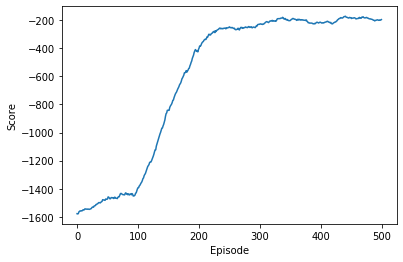

In [7]:
value_net1 = models.DDPGValueNetwork(state_size, action_size, 256, 256)
value_net2 = models.DDPGValueNetwork(state_size, action_size, 256, 256)
policy_net = models.DDPGPolicyNetwork(state_size, action_size, 256, 256)

max_act = env.action_space.high
min_act = env.action_space.low
print(max_act.shape)
noise_proc = Gaussian(x_size=env.action_space.shape, 
                      mu=0., sigma_init=0.1, sigma_final=1, 
                      sigma_horizon=1)

action = env.action_space.sample()
#noise_proc = OrnsteinUhlenbeck(x0=np.zeros_like(action))

lr_val = 1e-3
lr_pol = 1e-3

agent = TD3(policy_net=policy_net,
                 value_net1=value_net1,
                 value_net2=value_net2,
                 gamma=0.99, 
                 lr_val=1e-3,
                 lr_pol=1e-3,
                 buf_size=int(1e5),
                 batch_size=64,
                 tau=1e-3,
                 device="cpu",
                 max_grad_norm=0.5,
                 min_act=min_act,
                 max_act=max_act,
                 noise_process=None,
                 warm_up=1e2,
                 policy_delay=2,
                 learn_every=1,
                 seed=0)


alg_name = "td3_{}".format(env_name)
max_score = -20.
scores = agent.train(env, tmax, n_episodes, alg_name, max_score)
plot(scores, 50)

### 4.1 Trained Agent Demonstration

In [ ]:
agent.test(env, tmax, render=True, n_episodes=5)